# EDA: Graphs

Graphs for mosquito/WNV positive tests over time and temperature/mosquito levels over time.

[EDA: Basic](./EDA: Basic.ipynb)

[EDA: Graphs](./EDA: Graphs.ipynb)

[EDA: Maps](./EDA: Map.ipynb)

[EDA: Weather](./EDA: Weather.ipynb)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

import seaborn as sns
import matplotlib.dates as mdates

In [11]:
# For zoomed-out Jupyter Notebook

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

%config InlineBackend.figure_format = 'retina'

In [12]:
sp = pd.read_csv('./assets/spray.csv')
weather = pd.read_csv('./assets/weather_clean.csv')
weather = weather.iloc[:, 1:]

In [13]:
# Set all indexes to datetime (for concat)
sp['Date'] = pd.to_datetime(sp['Date'])
sp = sp.set_index('Date')

# index of all spray dates
sp_dates = sp.index.unique()

In [14]:
new = pd.read_csv('assets/West_Nile_Virus__WNV__Mosquito_Test_Results.csv')

In [15]:
# Minor runtime warning

new['TEST DATE'] = pd.to_datetime(new['TEST DATE'])
new.set_index('TEST DATE', inplace=True)
new['result'] = [1 if x == 'positive' else 0 for x in new['RESULT']]
for x in new.index:
    new.loc[x, 'date'] = x.date().isoformat()

In [16]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [17]:
wnv2 = []

for date in new['date'].unique():
    
    wnv_res = {'date': date,
               'week': new.loc[new['date'] == date, 'WEEK'].mode().values[0],
               'mosq': new.loc[new['date'] == date, 'NUMBER OF MOSQUITOES'].sum(),
               'wnv': new.loc[new['date'] == date, 'result'].sum()
              }
    
    try:
        wnv_res['temp'] = weather.loc[weather['Date'] == date, 'Tavg'].values[0]
    except:
        wnv_res['temp'] = weather['Tavg'].mean()
        
    wnv2.append(wnv_res)
    
wnv2 = pd.DataFrame(wnv2)
wnv2.set_index('date', inplace=True)
wnv2.sort_index(inplace=True)

wnv2.index = pd.to_datetime(wnv2.index)

Mosquito and WNV levels over time


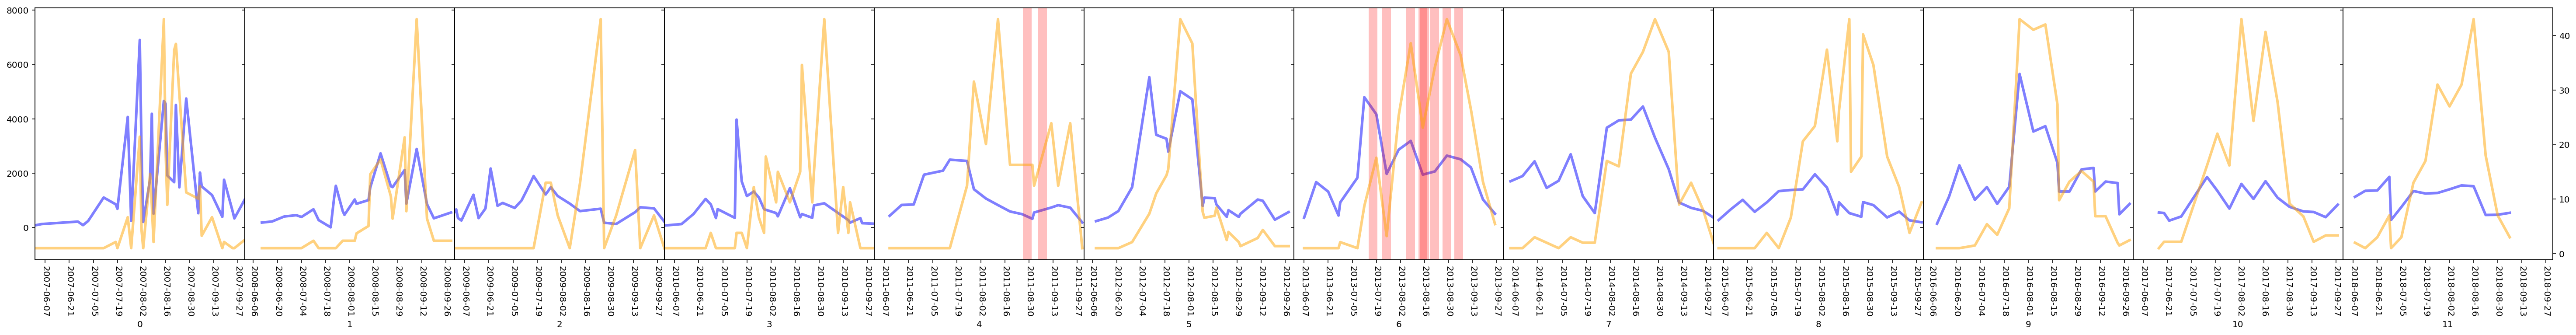

In [18]:
# Subplots

ymin = wnv2['mosq'].min() - wnv2['mosq'].std()
ymax = wnv2['mosq'].max() + wnv2['mosq'].std()

years = len(wnv2.index.year.unique())

fig = plt.figure(figsize=(40,4))

line_weight = 3
alpha = .5

for _, year in enumerate(wnv2.index.year.unique()):
        
    # Get subplot dimensions

    left = _/years
    width = 1/years
    
    # For each year, get the xmin and xmax (to set graph)
    
    xmin = datetime(year, 6, 1)
    xmax = datetime(year, 10, 1)
    
    yearplot = wnv2[wnv2.index.year == year]
    
    # Plot the plots

    if _ == 0:
        
        ax_ = fig.add_axes([left, 0, width, 1], ylim=(ymin, ymax), xlim=(xmin, xmax))    
        ax_.set(xlabel=str(_))
        
        ax_.tick_params(axis='x', rotation=270)
        
        plt.plot(yearplot.index, yearplot['mosq'], color='blue', lw=line_weight, alpha=alpha);
        
        ax2 = ax_.twinx() 
            
        plt.plot(yearplot.index, yearplot['wnv'], color='orange', lw=line_weight, alpha=alpha);
        
        for x in sp_dates:
            ax_.axvline(x, lw=10, color='red', alpha=.25)
        
    else:
        
        ax_ = fig.add_axes([left, 0, width, 1], ylim=(ymin, ymax), yticklabels=[], xlim=(xmin, xmax))    
        ax_.set(xlabel=str(_))
                
        ax_.tick_params(axis='x', rotation=270)
        
        plt.plot(yearplot.index, yearplot['mosq'], color='blue', lw=line_weight, alpha=alpha);
        
        for x in sp_dates:
            ax_.axvline(x, lw=10, color='red', alpha=.25)

        ax2 = ax_.twinx()
            
        plt.plot(yearplot.index, yearplot['wnv'], color='orange', lw=line_weight, alpha=alpha);
        
        ax_.set_ylabel('')
        
print('Mosquito and WNV levels over time')

In [20]:
wnv3 = wnv2.groupby('week').mean()

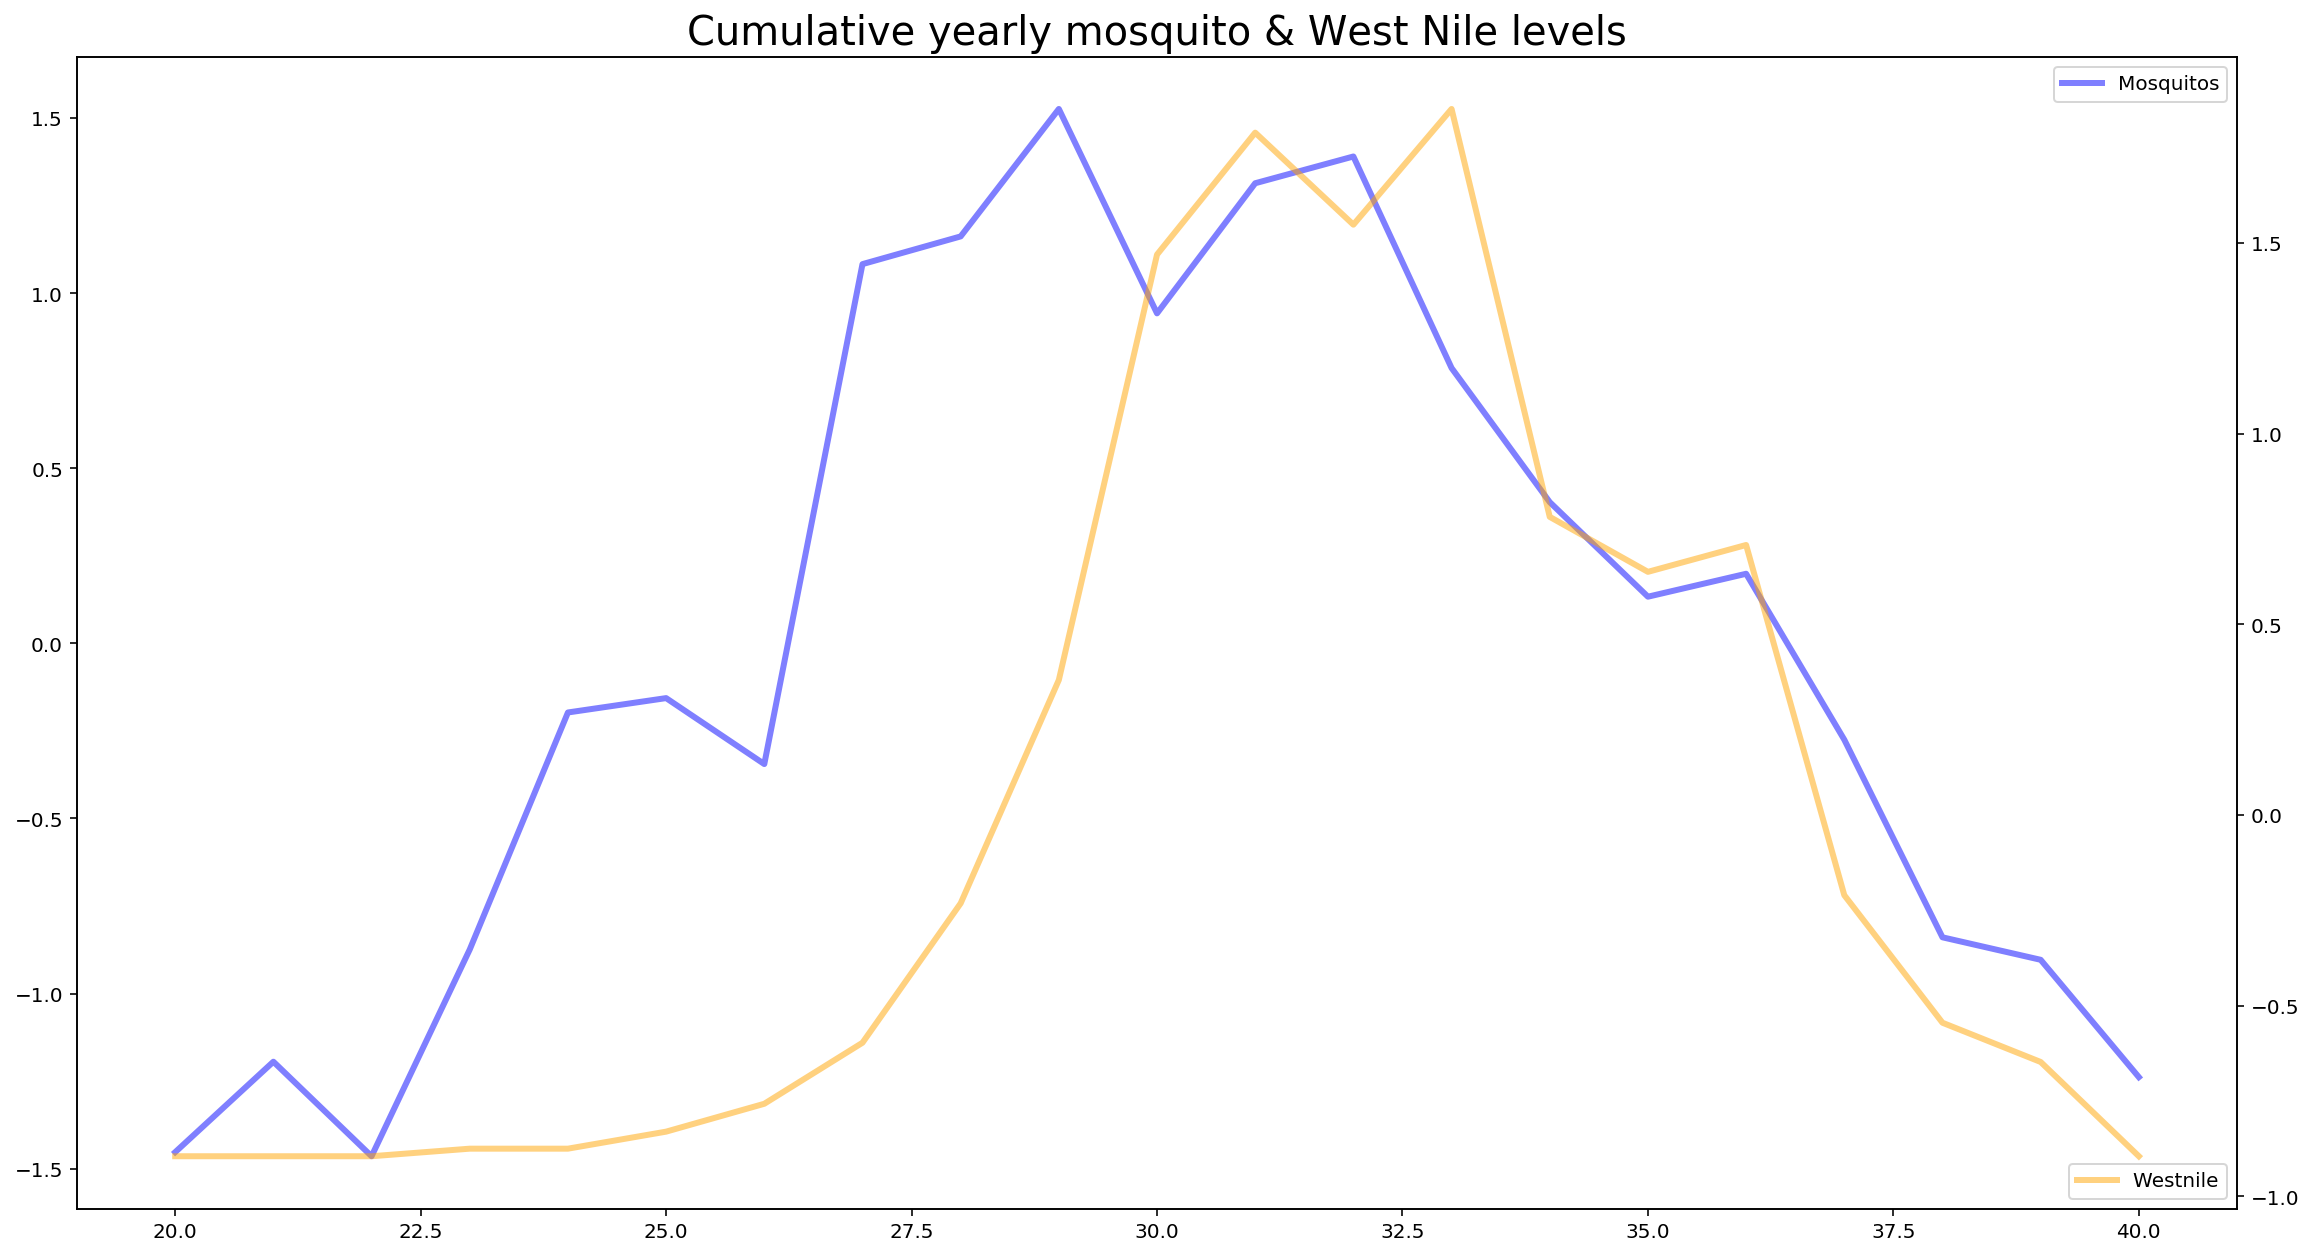

In [28]:
# Plot a line for each year

# Subplots

fig = plt.figure(figsize=(15, 8))

line_weight = 3
alpha = .5

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx()

ax1.plot(wnv3['mosq'], color='blue', lw=line_weight, alpha=alpha, label='Mosquitos')
ax2.plot(wnv3['wnv'], color='orange', lw=line_weight, alpha=alpha, label='Westnile')

ax1.legend()
ax2.legend(loc='lower right')
plt.title('Cumulative yearly mosquito & West Nile levels', fontsize=20)
        
plt.show()

In [22]:
wnv_standard = wnv3
for x in wnv_standard.columns:    
    wnv_standard[x] = (wnv_standard[x] - wnv_standard[x].mean()) / wnv_standard[x].std()

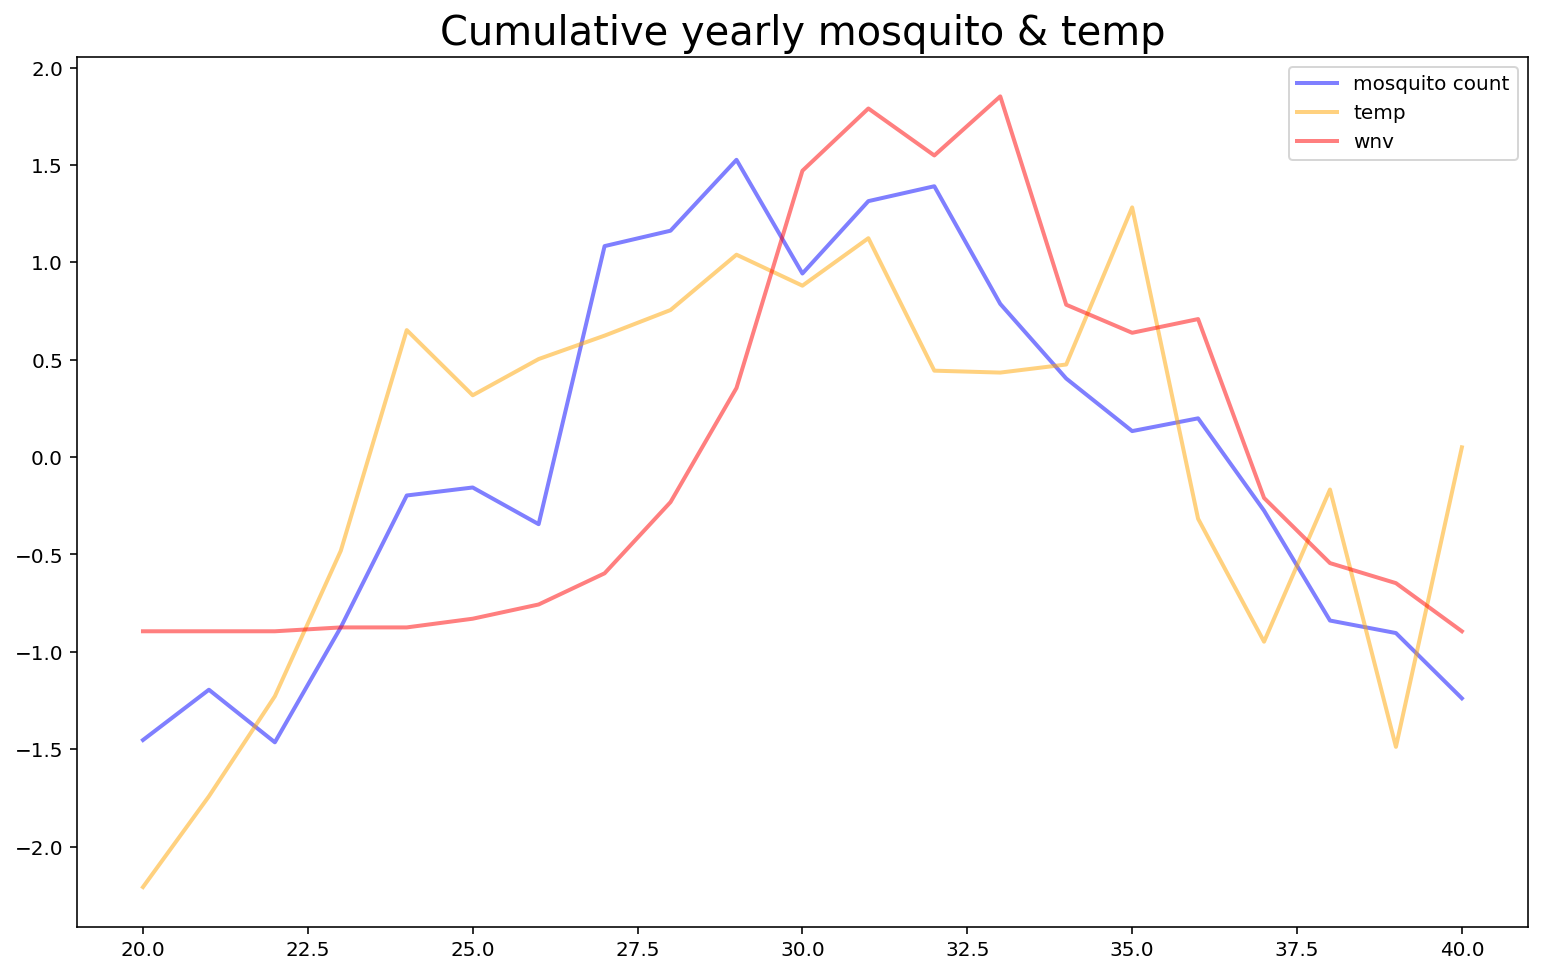

In [29]:
fig = plt.figure(figsize=(13, 8))

line_weight = 2
alpha = .5

plt.plot(wnv_standard['mosq'], color='blue', lw=line_weight, alpha=alpha, label='mosquito count')
plt.plot(wnv_standard['temp'], color='orange', lw=line_weight, alpha=alpha, label='temp')
plt.plot(wnv_standard['wnv'], color='red', lw=line_weight, alpha=alpha, label='wnv')

plt.legend()
plt.title('Cumulative yearly mosquito & temp', fontsize=20)
        
plt.show()